In [18]:
from sklearn.datasets import load_boston

boston_datasets = load_boston()
import pandas as pd
df = pd.DataFrame(boston_datasets.data, columns=boston_datasets.feature_names)

# Se agrega la variable de respuesta
df["MEDV"] = boston_datasets.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [20]:
X = df["LSTAT"].values.reshape(-1,1)
y = df["MEDV"].values.reshape(-1,1)

In [22]:
# Se crea el split de datos

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Se utiliza la libreria PolynomialFestures
poly = PolynomialFeatures(degree=3)

In [24]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Creando y entrenando el modelo
reg = LinearRegression().fit(X_train_poly,y_train)

# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train_poly)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test_poly)

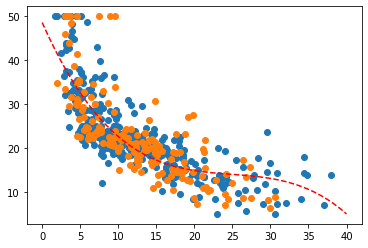

In [27]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,40).reshape(-1,1)
# Con el modelo predecimos X_plot
X_plot_poly = poly.fit_transform(X_plot)
y_plot = reg.predict(X_plot_poly)

# Se grafica el modelo
plt.plot(X_plot, y_plot, "r--")

In [28]:
from sklearn.metrics import r2_score
# Calcular error
print("Train", r2_score(y_train, y_train_hat))
print("Test", r2_score(y_test, y_test_hat))

Train 0.6820523974977729
Test 0.6150559372890414


In [29]:
# Preparación de datos iniciales
X = df[["LSTAT"]]
y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se procesan los polinomios
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Se entrena el modelo
reg = LinearRegression().fit(X_train_poly,y_train)

# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train_poly)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test_poly)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.6607355856920534
Prueba 0.6057480327377558
